# LMS Exploration | scikit-learn Digits Classifier

---


- scikit-learn이 예제로 제공하는 Toy datasets 중 load_digits dataset 을 활용한다.


- load_digits의 data는 총 1797개이고, feature는 64개의 픽셀값(8x8 이미지)이며, label은 0~9 사이의 숫자이다.


- 숫자이미지는 총 43명의 손글씨가 사용되었으며, 이 중 30명의 손글씨는 훈련 데이터에, 나머지 13명의 손글씨는 테스트 데이터로 구성한다.


- load_digits dataset을 활용하여 숫자이미지 분류기를 만들어보자.


- 숫자이미지 분류기는 각 이미지 데이터가 입력되었을 때 그 이미지가 숫자 몇을 나타내는 이미지인지 맞추는 분류모델이다.


- Decision Tree, Random Forest, SVM, SGD Classifier, Logistic Regression 의 다양한 모델로 학습시키고, 평가해본다.

## (1) 모듈 import

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

## (2) 데이터 준비

In [2]:
digits = load_digits()
digits_data = digits.data

## (3) 데이터 이해하기

Feature Data 지정, Label Data 지정, Target Names 출력, 데이터 Describe 하기

In [3]:
print(digits.keys()) #객체가 가진 변수와 메서드 나열 출력
print(digits_data.shape) #배열의 형상정보 출력
digits_data[0] # index가 0인 데이터 출력

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
(1797, 64)


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

- digits의 data는 1797개의 데이터가 각각 64개의 정보를 담고 있음.
- digits 는 이미지 데이터로, 각 숫자는 픽셀을 의미함. 길이 64의 숫자 배열은 (8x8) 크기의 이미지를 일렬로 펴 놓은 것임. 


In [4]:
digits_label = digits.target 
print(digits_label.shape)
digits_label

(1797,)


array([0, 1, 2, ..., 8, 9, 8])

In [5]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

- target 데이터는 총 1797 개의 데이터가 있고, 0부터 9까지의 숫자로 나타남. 

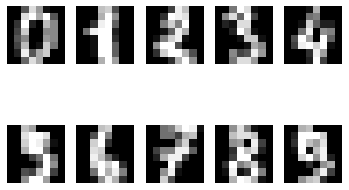

In [6]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

In [7]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

## (4) train, test 데이터 분리

In [8]:
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))

X_train 개수:  1437 , X_test 개수:  360


## (5) 다양한 모델로 학습시켜보기

Decision Tree, Random Forest, SVM, SGD Classifier, Logistic Regression

### 1. Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=32)

In [10]:
y_pred = decision_tree.predict(X_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print(f'\nDecision_Tree 모델의 정확도는 {accuracy_DT}입니다\n')
print(classification_report(y_test, y_pred))


Decision_Tree 모델의 정확도는 0.8555555555555555입니다

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



### 2.Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)
accuracy_RF = accuracy_score(y_test, y_pred)

print(f'\nRandom Forest 모델의 정확도는 {accuracy_RF}입니다\n')
print(classification_report(y_test, y_pred))


Random Forest 모델의 정확도는 0.9638888888888889입니다

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.93      1.00      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.84      0.91        43
           9       0.94      0.94      0.94        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360



### 3.SVM

In [12]:
from sklearn import svm
svm_model = svm.SVC(random_state=32)

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
accuracy_SVM = accuracy_score(y_test, y_pred)

print(f'\nSVM 모델의 정확도는 {accuracy_SVM}입니다\n')
print(classification_report(y_test, y_pred))


SVM 모델의 정확도는 0.9888888888888889입니다

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



### 4.SGD Classifier

In [13]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier(random_state=32)

sgd_model.fit(X_train, y_train)

y_pred = sgd_model.predict(X_test)
accuracy_SGD = accuracy_score(y_test, y_pred)

print(f'\nSGD Classifier 모델의 정확도는 {accuracy_SGD}입니다\n')
print(classification_report(y_test, y_pred))


SGD Classifier 모델의 정확도는 0.9388888888888889입니다

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.85      0.95      0.90        42
           2       0.98      1.00      0.99        40
           3       0.89      0.94      0.91        34
           4       1.00      0.97      0.99        37
           5       0.93      1.00      0.97        28
           6       0.96      0.93      0.95        28
           7       0.97      0.97      0.97        33
           8       0.88      0.88      0.88        43
           9       0.96      0.72      0.82        32

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



### 5.Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(random_state=32)

logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)
accuracy_LR = accuracy_score(y_test, y_pred)

print(f'\nLogistic Regression 모델의 정확도는 {accuracy_LR}입니다\n')
print(classification_report(y_test, y_pred))


Logistic Regression 모델의 정확도는 0.9527777777777777입니다

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        42
           2       0.98      1.00      0.99        40
           3       0.94      0.97      0.96        34
           4       0.97      1.00      0.99        37
           5       0.82      0.96      0.89        28
           6       1.00      0.96      0.98        28
           7       0.97      0.97      0.97        33
           8       0.92      0.81      0.86        43
           9       0.97      0.91      0.94        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## (6)모델 평가해 보기

- 모델의 성능을 평가하는 지표로 무엇이 적절할까?
- sklearn.metrics에서 제공하는 평가지표중 적절한 것은 선택하고, 선택한 이유를 설명하라

### Visualize Confusion Matrix 

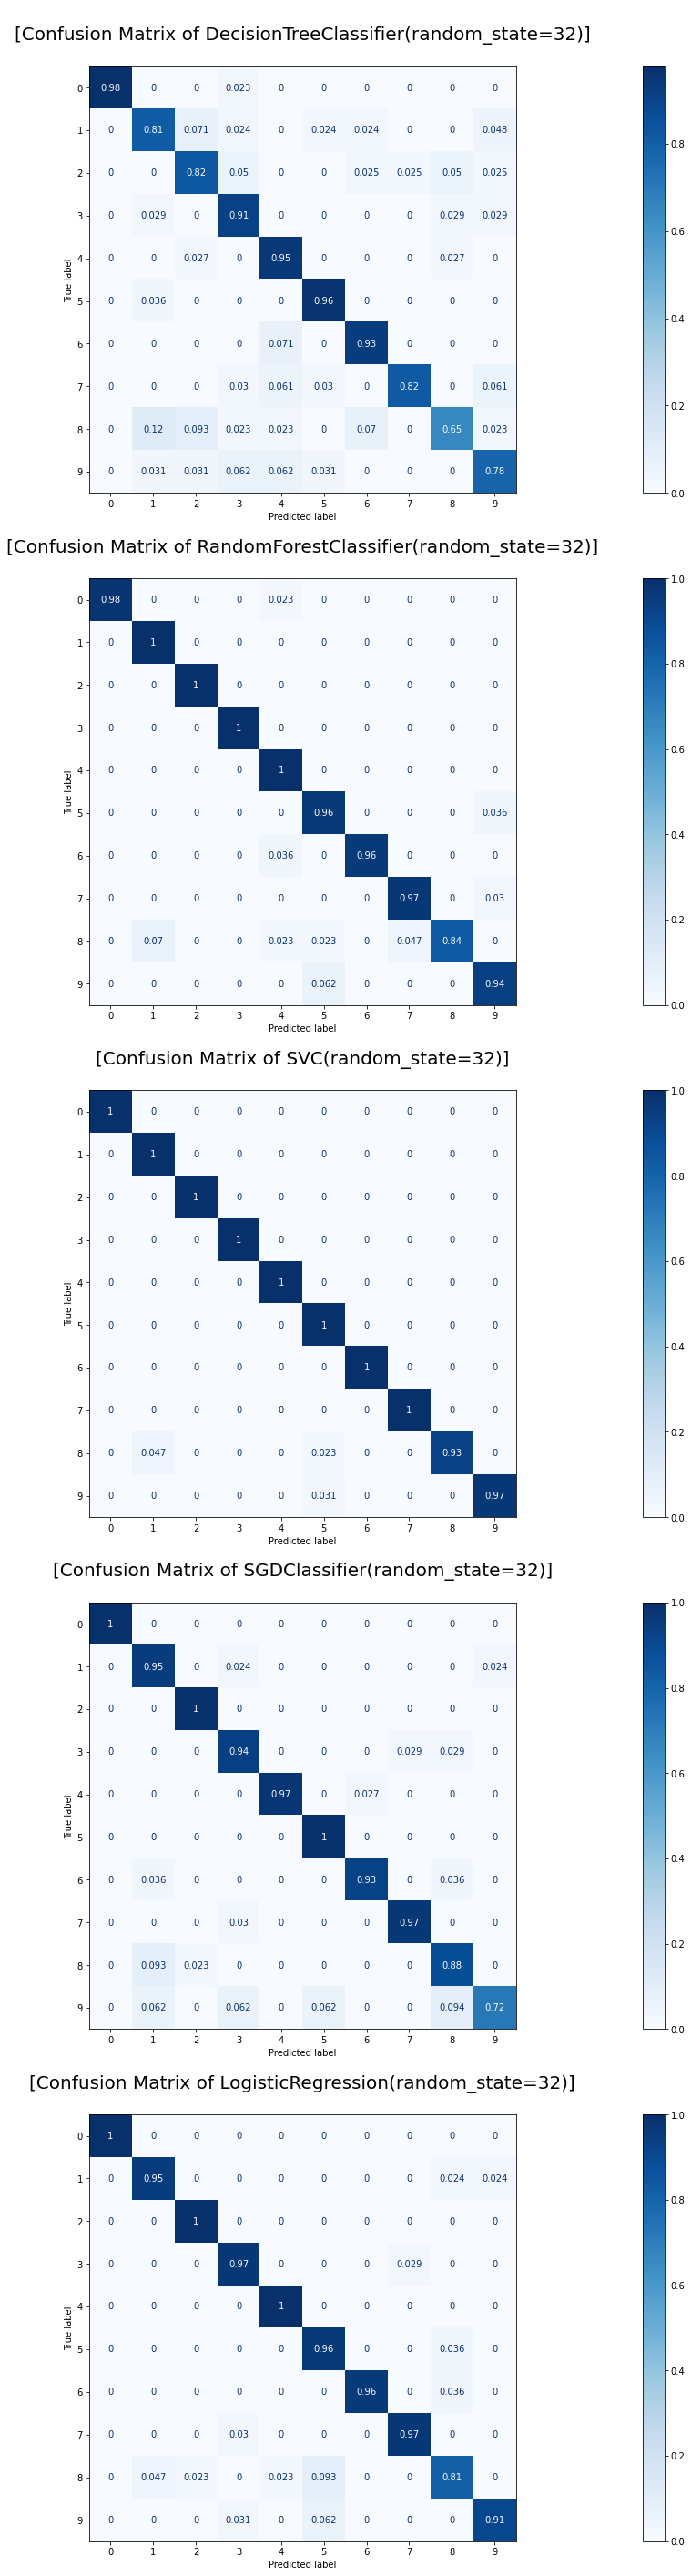

In [15]:
#- Confusion Matrix 시각화 함수
from sklearn.metrics import plot_confusion_matrix


def Visualize_Confusion_Matrix(model, X_test, y_test, label):
    #fig, ax = plt.subplots(figsize=(50, 50))
    plot = plot_confusion_matrix(model, X_test, y_test, display_labels=label, cmap=plt.cm.Blues, normalize='true', ax=ax)
    plot.ax_.set_title(f'\n[Confusion Matrix of {model}]\n', fontsize=20) 
    
model = [decision_tree, random_forest, svm_model, sgd_model, logistic_model]

fig = plt.figure(figsize=(50,50))
for i in range (len(model)):
    ax = fig.add_subplot(len(model),1,i+1)
    Visualize_Confusion_Matrix(model[i], X_test, y_test, digits.target_names )
        

### Compare Accuracy
각 모델의 test accuracy를 비교하여 가장 성능이 좋은 모델을 선정한다.

In [16]:
import operator

dict = {'Decision Tree':accuracy_DT, 'Random Forest':accuracy_RF, 'SVM':accuracy_SVM, 'SGD Classifier':accuracy_SGD, 'Logistic Regression':accuracy_LR}
sdict = sorted(dict.items(), key=operator.itemgetter(1), reverse=True)

print('\n[정확도가 높은 모델 순서]\n')
for i in range(len(sdict)):
    print(f'{i+1}.{sdict[i][0]}, 정확도 : {sdict[i][1]} ')
    
print(f'\n\n가장 정확도가 높은 모델은 {sdict[0][0]}이고, 정확도는 {sdict[0][1]}이며, \n가장 정확도가 낮은 모델은 {sdict[len(sdict)-1][0]}이고, 정확도는 {sdict[len(sdict)-1][1]}입니다\n')


[정확도가 높은 모델 순서]

1.SVM, 정확도 : 0.9888888888888889 
2.Random Forest, 정확도 : 0.9638888888888889 
3.Logistic Regression, 정확도 : 0.9527777777777777 
4.SGD Classifier, 정확도 : 0.9388888888888889 
5.Decision Tree, 정확도 : 0.8555555555555555 


가장 정확도가 높은 모델은 SVM이고, 정확도는 0.9888888888888889이며, 
가장 정확도가 낮은 모델은 Decision Tree이고, 정확도는 0.8555555555555555입니다



---

digits 데이터는 균형 잡힌 dataset으로, confusion matrix에서 각 target(숫자 0~9)의 정답률이 균형있게 나타난다. 그렇기에 digits classification 모델의 성능을 평가하는 가장 중요한 지표는 '전체 데이터 중 올바르게 판단한 데이터 개수의 비율' 즉, **Accuracy** 지표이다. 숫자 이미지를 얼마나 정확하게 분류 해내는지가 **숫자이미지분류기**의 성능을 평가하는 중요한 지표인 것이다.


결과적으로, digits Classification 문제 해결에 SVC Classification Model이 가장 적합하다. 